In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import metrics
import itertools
import pickle

In [5]:
df = pd.read_csv("fake_or_real_news.csv",encoding = "ISO-8859-1")

# df.shape
# df.head()

df.columns = ['#words','title','text','label']
df.dropna(how='any')


adf=df.copy()
adf.loc[df["label"] == 'REAL',"label"] = 1
adf.loc[df["label"] == 'FAKE',"label"] = 0
adf.head()


,#words,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [6]:
X = adf['text']
y = adf['label']
print(X.head(),y.head())
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.head(),X_test.head(),y_train.head(),y_test.head())


0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    â Kaydee King (@KaydeeKing) November 9, 2016...
4    It's primary day in New York and front-runners...
Name: text, dtype: object 0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64
2402    Christian Whiton is a former deputy special en...
1922    Super Tuesday Brings Harsh Light And Heartache...
3475    Prev post Page 1 of 4 Next \nNurses are among ...
6197    The deadly hostage situation at a luxury hotel...
4748    Our new country: Women and minorities hit hard...
Name: text, dtype: object 3789    Watch the above reports by CBN's David Brody a...
733     â Bernie Sanders (@BernieSanders) October 27...
4783    \nAs of October 29, there have been at least 1...
3067    Members of Congress have said that if Hillary ...
5288    Julian Zelizer is a professor of history and p...
Name: text, dtype: object 2402  

In [7]:
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vect.fit_transform(X_train,y_train)
tfidf_test = tfidf_vect.transform(X_test)

In [8]:
count_vect= CountVectorizer()
count_train = count_vect.fit_transform(X_train,y_train)
count_test = count_vect.transform(X_test)


In [9]:
n_vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
n_train = n_vect.fit_transform(X_train)
n_test = n_vect.transform(X_test)


In [10]:
vectorizer = [tfidf_vect,count_vect,n_vect]
vectorizer_train = [tfidf_train,count_train,n_train]
vectorizer_test = [tfidf_test,count_test,n_test]
zip_vect = zip(vectorizer_train,vectorizer_test,vectorizer)

In [11]:
def NaiveBayes(nlp_train,y_train,nlp_test,y_test):
    clf = MultinomialNB(alpha=0.5, fit_prior=True) #alpha is the smoothing parameter 1 by default
    clf.fit(nlp_train,y_train)
    sc1 = clf.score(nlp_test,y_test)
    print("The Score is: ")
    print(sc1)
    pred = clf.predict("nlp_test")
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])
    print("Right up to here")

In [12]:
def Logreg(nlp_train,y_train,nlp_test,y_test,nlp_vect):
    logreg = LogisticRegression(C=9)
    logreg.fit(nlp_train,y_train)
    sc = logreg.score(nlp_test,y_test)
    print("The Score is: ")
    print(sc)
    pred = logreg.predict(nlp_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])

In [13]:
def RForest(nlp_train,y_train,nlp_test,y_test):
    clf1 = RandomForestClassifier(max_depth=50, random_state=0,n_estimators=25)
    clf1.fit(nlp_train,y_train)
    sc2 = clf1.score(nlp_test,y_test)
    print("The Score is: ")    
    print(sc2)
    pred = clf1.predict(nlp_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
 
    plt.figure()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    print("-----------------")

In [25]:
vect_test

<1267x122950 sparse matrix of type '<class 'numpy.int64'>'
	with 887000 stored elements in Compressed Sparse Row format>

In [26]:
a = np.array("Hello, I am a good man.")

For TFIDF
For Logarithamic Classifier


/home/prajwol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Score is: 
0.9344909234411997
Confusion matrix, without normalization
[[576  39]
 [ 44 608]]
-----------------
For Random Forest
The Score is: 
0.8768745067087609
Confusion matrix, without normalization
[[530  85]
 [ 71 581]]
-----------------
For Count
For Logarithamic Classifier


/home/prajwol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Score is: 
0.9076558800315706
Confusion matrix, without normalization
[[557  58]
 [ 59 593]]
-----------------
For Random Forest
The Score is: 
0.8610891870560379
Confusion matrix, without normalization
[[532  83]
 [ 93 559]]
-----------------
For Logarithamic Classifier


/home/prajwol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Score is: 
0.9100236779794791
Confusion matrix, without normalization
[[565  50]
 [ 64 588]]
-----------------
For Random Forest
The Score is: 
0.8705603788476717
Confusion matrix, without normalization
[[539  76]
 [ 88 564]]
-----------------


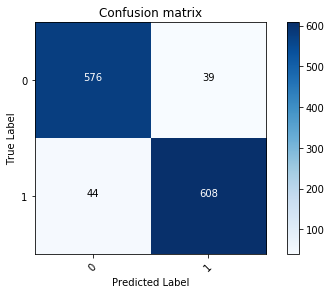

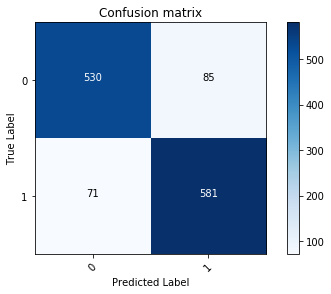

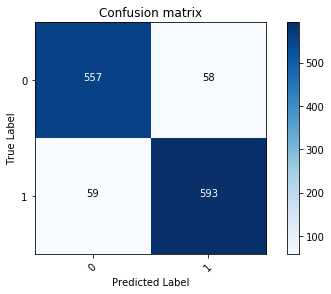

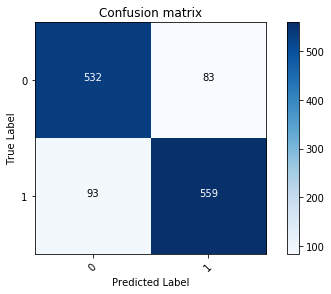

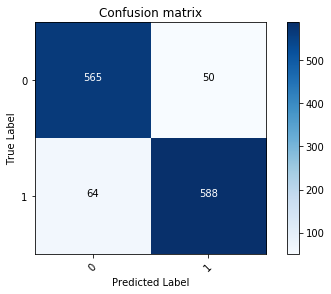

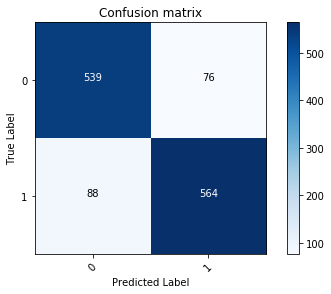

In [15]:
for vect_train,vect_test,vect in zip_vect:
   
    if(vect == tfidf_vect):
        print("For TFIDF")
    elif(vect == count_vect):
        print("For Count")
    
#     print("For Multinomial Naive Bayes Model")
#     NaiveBayes(vect_train,y_train,vect_test,y_test)
    
    print("For Logarithamic Classifier")
    Logreg(vect_train,y_train,vect_test,y_test,vect)
    
    print("For Random Forest")
    RForest(vect_train,y_train,vect_test,y_test)

# Predicting the Model

In [16]:
var = input("Please enter the news that you want to verify as fake or real: ")

#predicts whether the news is fake or not
def detecting_fake_news(var):    
#logreg has the maximum accuracy so retrieving it
    load_model = pickle.load(open('final_logreg_model.sav', 'rb'))
    print("Good")
    prediction = load_model.predict(var)
    print("Good")
    prob = load_model.predict_proba(var)

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))


if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news that you want to verify as fake or real: 
Good


ValueError: Expected 2D array, got scalar array instead:
array=.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df = pd.read_csv("final_logreg_model.csv",encoding = "ISO-8859-1")

df.shape
df.head()